In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 엑셀 파일 경로
file_path = r'C:\Users\james\OneDrive\바탕 화면\J DATA LAB\SL_db.xlsx'

# 엑셀 파일을 데이터프레임으로 불러오기
data = pd.read_excel(file_path)

In [3]:
# 데이터 확인
print(data.head())

# 데이터 정보 확인
print(data.info())

          날짜  번호     기업명                  센터명                    기업명.1   등급  \
0 2023-03-24   1    ㈜파스토            파스토 용인1센터  경기도 용인시 처인구 백암면 원설로 677  1등급   
1 2021-07-29   2     ㈜한진    한진 대전 Mega-hub터미널      대전광역시 유성구 대정동 300-1  1등급   
2 2021-07-29   3  ㈜로지스밸리     ㈜로지스밸리에스엘케이 안산센터    경기도 안산시 단원구 시화호수로 835  3등급   
3 2021-07-29   4     씨제이  CJ대한통운㈜ Megahub 곤지암   경기도 광주시 초월읍 산수로 642-70  1등급   
4 2021-07-29   5    ㈜하나로        하나로TNS 동탄물류센터   경기도 화성시 동탄산단4길 37(방교동)  5등급   

   본/인증  
0   본인증  
1  예비인증  
2   본인증  
3   본인증  
4   본인증  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      41 non-null     datetime64[ns]
 1   번호      41 non-null     int64         
 2   기업명     41 non-null     object        
 3   센터명     41 non-null     object        
 4   기업명.1   41 non-null     object        
 5   등급      41 non-null     object        
 6   본/인증  

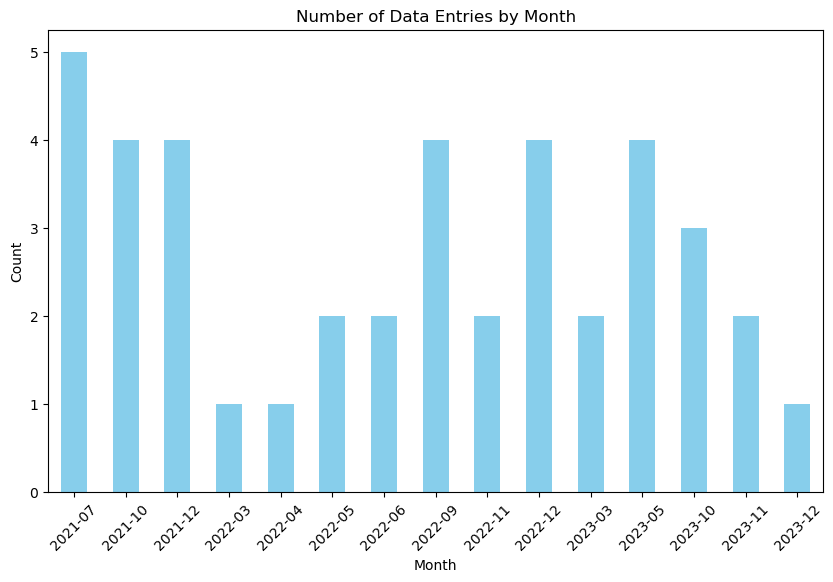

In [4]:
# 엑셀 파일 불러오기
df = pd.read_excel("SL_db.xlsx")

# "날짜" 열을 datetime 형식으로 변환
df["날짜"] = pd.to_datetime(df["날짜"])

# "날짜" 열을 기준으로 그룹화하여 월별 데이터 개수 계산
monthly_count = df.groupby(df["날짜"].dt.to_period("M")).size()

# 시각화
plt.figure(figsize=(10, 6))
monthly_count.plot(kind="bar", color="skyblue")
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Number of Data Entries by Month")
plt.xticks(rotation=45)
plt.show()

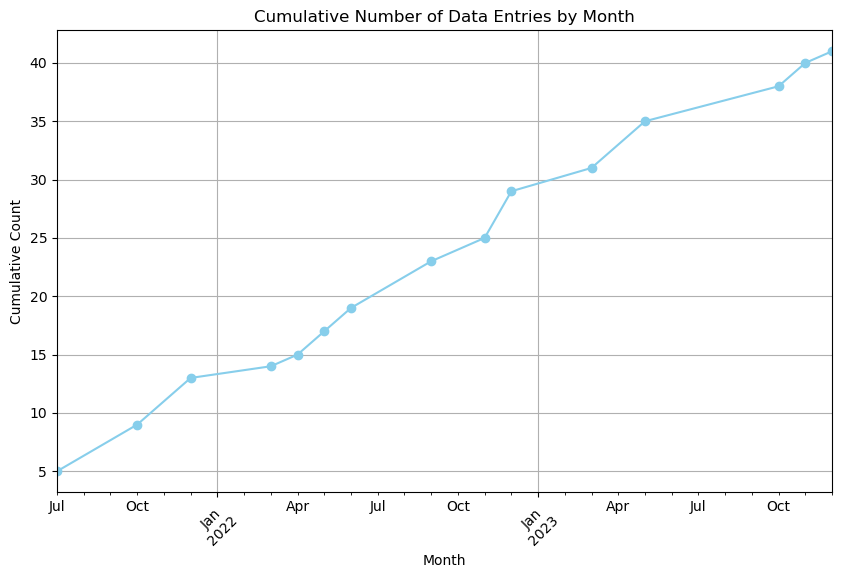

In [5]:
# "날짜" 열을 기준으로 그룹화하여 월별 데이터 개수 계산 후 누적 합계 구하기
monthly_cumulative_count = df.groupby(df["날짜"].dt.to_period("M")).size().cumsum()

# 시각화
plt.figure(figsize=(10, 6))
monthly_cumulative_count.plot(kind="line", marker="o", color="skyblue")
plt.xlabel("Month")
plt.ylabel("Cumulative Count")
plt.title("Cumulative Number of Data Entries by Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

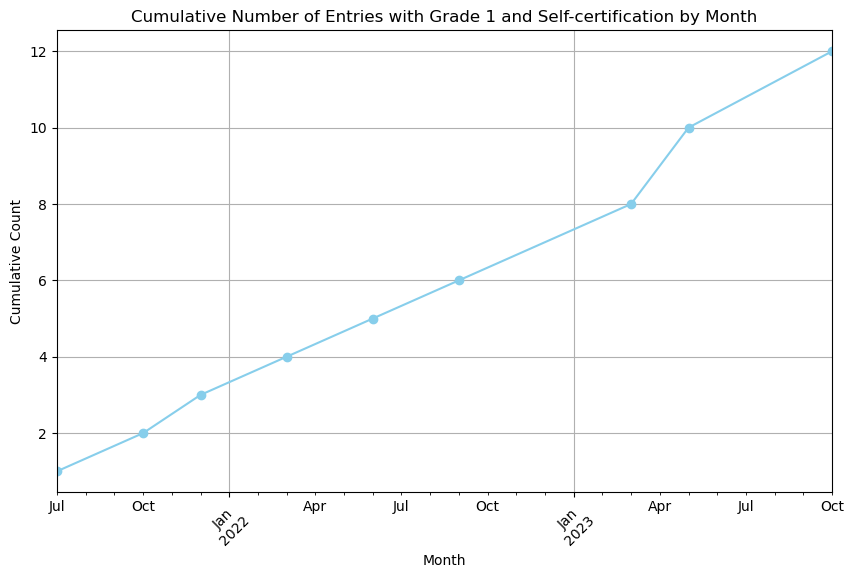

In [13]:
# '등급'이 '1등급'이고 '본/인증'이 '본인증'인 상태인 데이터 필터링
filtered_df = df[(df['등급'] == '1등급') & (df['본/인증'] == '본인증')]

# 필터링된 데이터를 월별로 그룹화하여 누적 개수 계산
monthly_cumulative_count = filtered_df.groupby(filtered_df["날짜"].dt.to_period("M")).size().cumsum()

# 시각화
plt.figure(figsize=(10, 6))
monthly_cumulative_count.plot(kind="line", marker="o", color="skyblue")
plt.xlabel("Month")
plt.ylabel("Cumulative Count")
plt.title("Cumulative Number of Entries with Grade 1 and Self-certification by Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()